In [1]:
#Permission to access Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries which I require in this project
!pip install category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [3]:
#In this part I want to Load the adverts dataset
adv = pd.read_csv('/content/drive/MyDrive/Dataset/adverts.csv')

In [4]:
# I want to display the head of adverts dataset
print("Dataset Head:")
adv.head()

Dataset Head:


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [5]:
#I want to display the dataset information
print("\nDataset Info:")
adv.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [6]:
# I want to specify the number of columns and rows in the datasheet.
print("\nDataset Shape:")
adv.shape


Dataset Shape:


(402005, 12)

In [7]:
print("\nDescriptive Statistics:")
print(adv.describe())


Descriptive Statistics:
       public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06


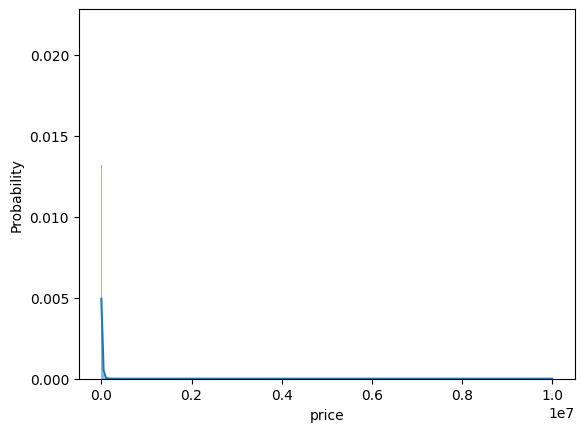

In [8]:
#Distribution of prices Visualisation
sns.histplot(data=adv, x='price', kde=True, stat='probability');

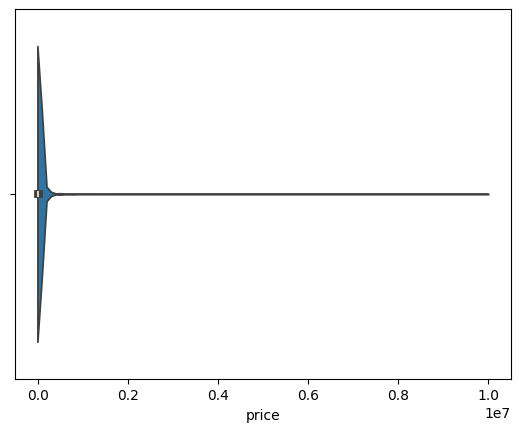

In [9]:
# Violin plot for the distribution of car prices visualization
sns.violinplot(data=adv, x='price');

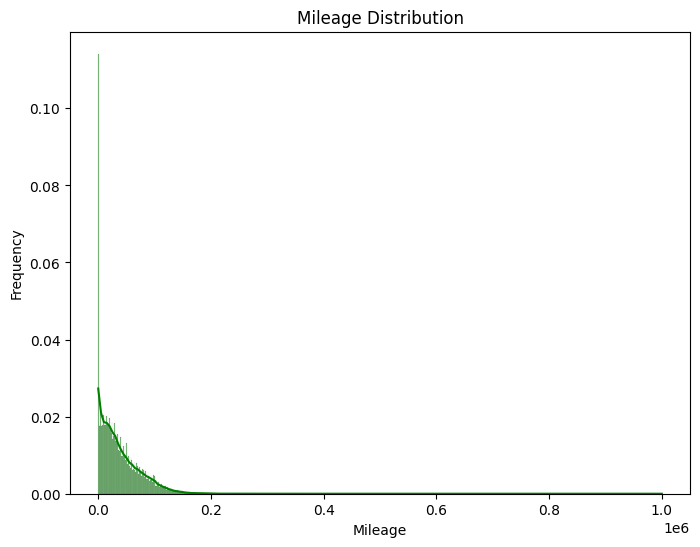

In [10]:
# Mileage Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=adv, x='mileage', kde=True, color='green', stat='probability')
plt.title('Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

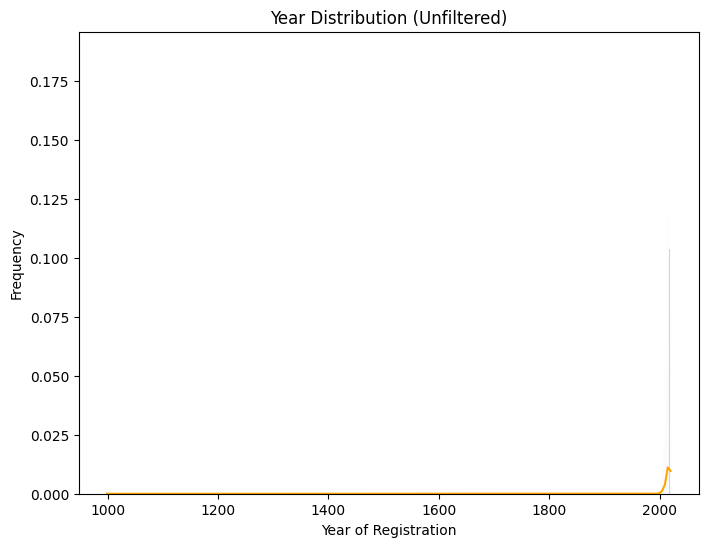

In [11]:
# Histogram of Year Distribution (Without Filtering)
plt.figure(figsize=(8, 6))
sns.histplot(data=adv, x='year_of_registration', kde=True, color='orange', stat='probability')
plt.title('Year Distribution (Unfiltered)')
plt.xlabel('Year of Registration')
plt.ylabel('Frequency')
plt.show()

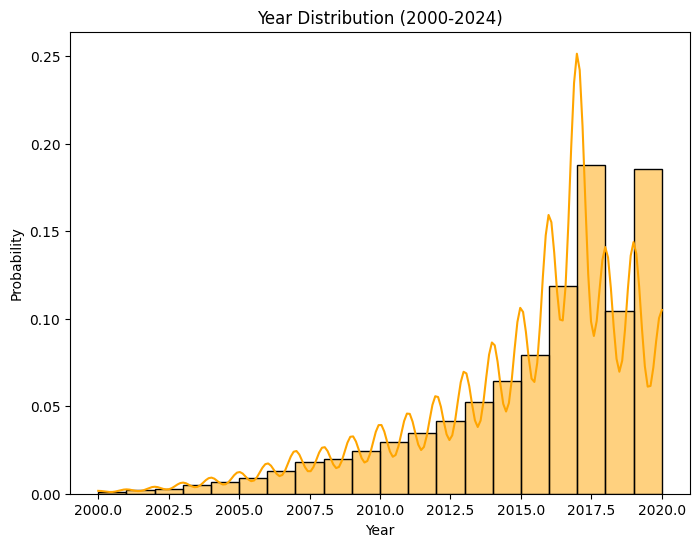

In [12]:
#Dataset filtering for years between 2000 and 2024
filtered_adv = adv[(adv['year_of_registration'] >= 2000) & (adv['year_of_registration'] <= 2024)]

# The histogram of filtered years
plt.figure(figsize=(8, 6))
sns.histplot(data=filtered_adv, x='year_of_registration', kde=True, color='orange', stat='probability', bins=20)
plt.title('Year Distribution (2000-2024)')
plt.xlabel('Year')
plt.ylabel('Probability')
plt.show()

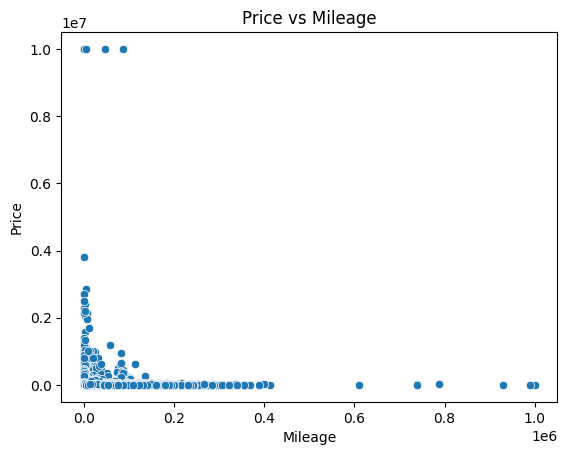

In [13]:
# Price and Mileage Scatter plot
sns.scatterplot(data=adv, x='mileage', y='price')
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

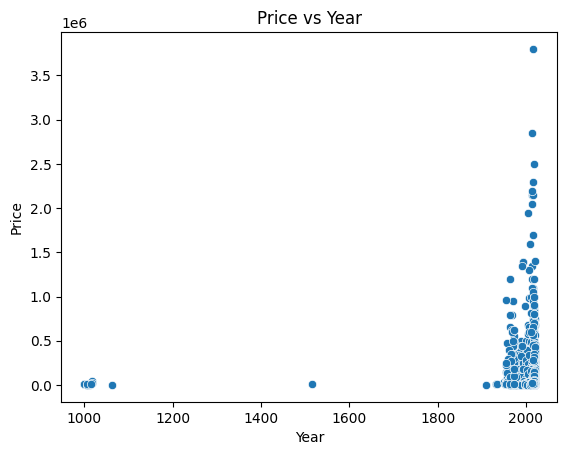

In [14]:
# Price and year_of_registration Scatter plot
sns.scatterplot(data=adv, x='year_of_registration', y='price')
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

<ipython-input-15-accac1626ce0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=adv, x='year_of_registration', y='price', palette='Set3')


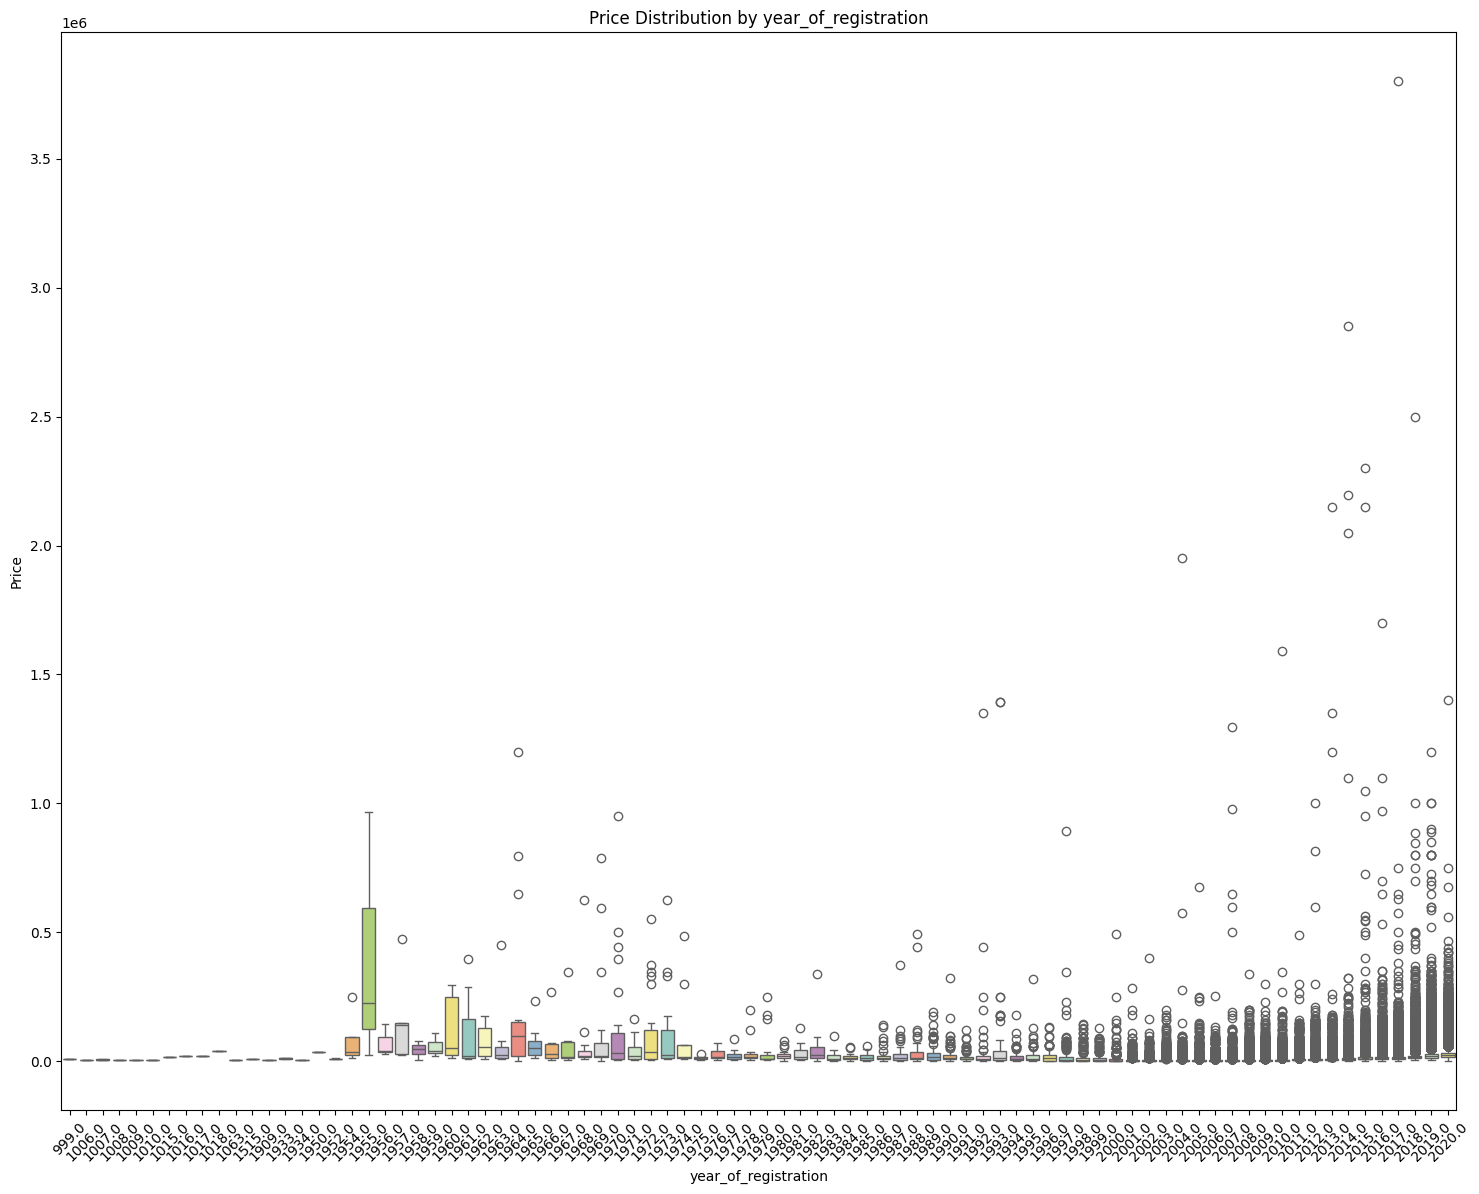

In [15]:
# Box Plot for year of registration vs price
plt.figure(figsize=(18, 14))  # Increase the figure size
sns.boxplot(data=adv, x='year_of_registration', y='price', palette='Set3')
plt.title('Price Distribution by year_of_registration')
plt.xlabel('year_of_registration')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

<ipython-input-16-5ccee0611b25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_adv['price_category'] = pd.cut(filtered_adv['price'],
<ipython-input-16-5ccee0611b25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_adv['year_group'] = pd.cut(filtered_adv['year_of_registration'],
<ipython-input-16-5ccee0611b25>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

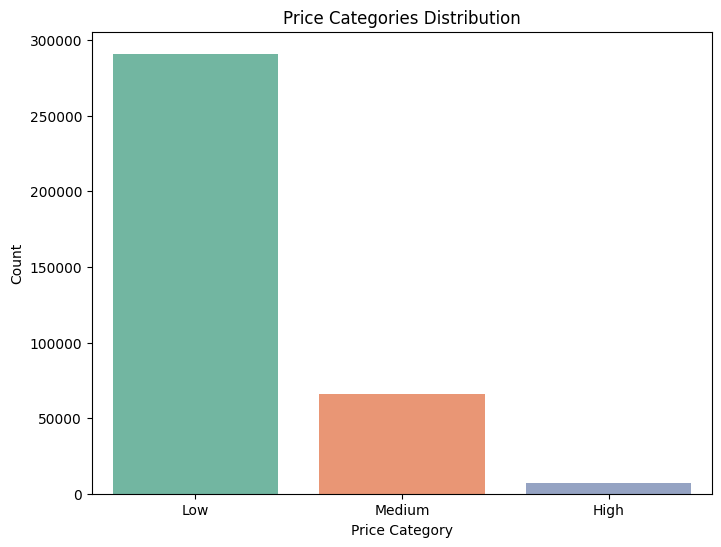

<ipython-input-16-5ccee0611b25>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_adv, x='year_group', y='price', palette='Set3')


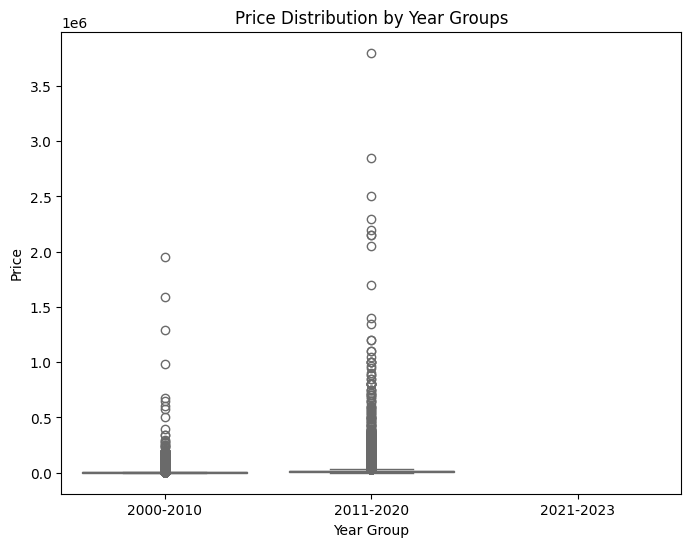

In [16]:
#I devided the year and prices into three categories for better visualization and deeper understanding
filtered_adv['price_category'] = pd.cut(filtered_adv['price'],
                                        bins=[0, 20000, 50000, 100000],
                                        labels=['Low', 'Medium', 'High'])

filtered_adv['year_group'] = pd.cut(filtered_adv['year_of_registration'],
                                    bins=[2000, 2010, 2020, 2023],
                                    labels=['2000-2010', '2011-2020', '2021-2023'])

# Visualizations

#Plot a bar chart of price categories
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_adv, x='price_category', palette='Set2')
plt.title('Price Categories Distribution')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

# Price and year groups box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_adv, x='year_group', y='price', palette='Set3')
plt.title('Price Distribution by Year Groups')
plt.xlabel('Year Group')
plt.ylabel('Price')
plt.show()



<ipython-input-17-e257e9a5b0d4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')


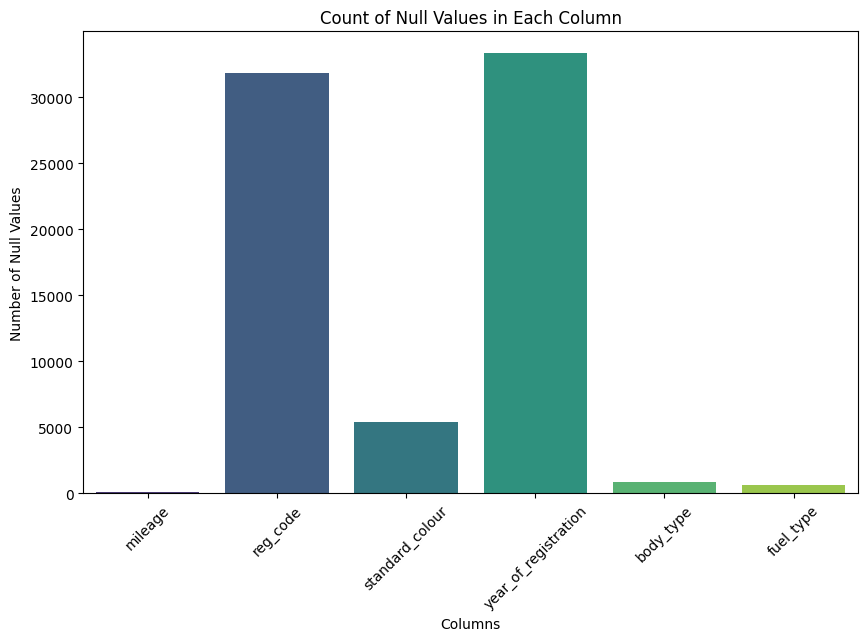

In [17]:
# I want to Count missing ​(null) values in each column
null_counts = adv.isnull().sum()

# Filtering the columns which do not have missing values (keeping only null values for plotting)
null_counts = null_counts[null_counts > 0]

# Plotting a bar chart for missing values
# viridis is a beautiful and popular color palette which comes by default in the Matplotlib and Seaborn libraries.
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')

# Write title and lables for the bar chart
plt.title('Count of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45) # I rotated x-axis lable for better readability


plt.show()


In [18]:
# Handling Missing Values
# Numerical columns: I want to replace missing values with median
num_cols = ['mileage', 'year_of_registration', 'price']
num_imputer = SimpleImputer(strategy='median')
adv[num_cols] = num_imputer.fit_transform(adv[num_cols])
# I want to fill missing values for categorical columns with "Unknown"
cat_cols = ['fuel_type', 'standard_make', 'body_type', 'vehicle_condition', 'standard_colour']
for col in cat_cols:
    adv[col].fillna('Unknown', inplace=True)
# Step 4: I want to check if any missing values remain in the numerical columns
print(adv[num_cols].isnull().sum())




mileage                 0
year_of_registration    0
price                   0
dtype: int64


<ipython-input-18-d0c3283906b7>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adv[col].fillna('Unknown', inplace=True)


In [19]:
#I use Target Encoding technique for Standard make
# Step 1: In this step I want to calculate the average price for each unique car brand
brand_means = adv.groupby('standard_make')['price'].mean()

# Step 2: In this step I want to encode car brands with their corresponding average price
adv['standard_make_encoded'] = adv['standard_make'].map(brand_means)

# Step 3: In this step I want to drop the original column to avoid redundancy
adv.drop(columns=['standard_make'], inplace=True)

# Step 4: Preview the update dataframe to verify changes
print(adv[['standard_make_encoded', 'price']].head())



   standard_make_encoded    price
0           24999.204914  73970.0
1           26422.624635   7000.0
2           13679.339198  14000.0
3            8178.179941   7995.0
4           35670.165799  26995.0


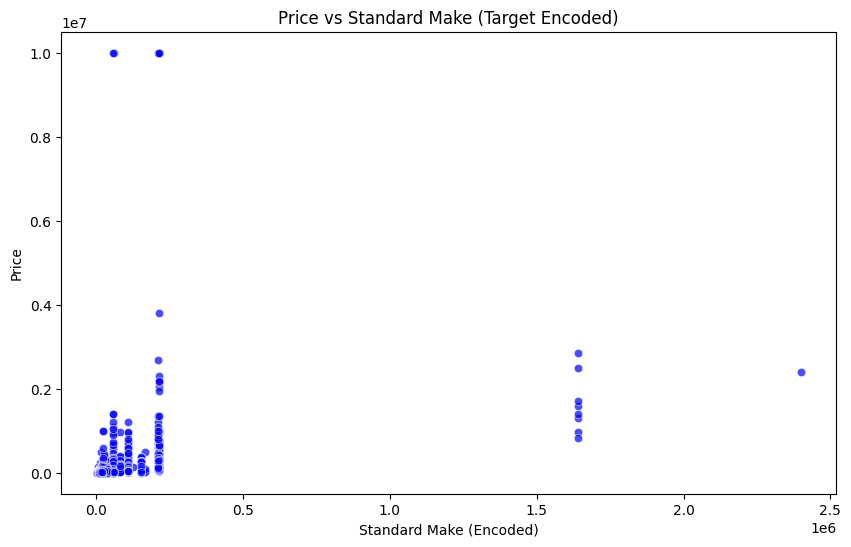

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adv, x='standard_make_encoded', y='price', alpha=0.7, color='blue')
plt.title('Price vs Standard Make (Target Encoded)')
plt.xlabel('Standard Make (Encoded)')
plt.ylabel('Price')
plt.show()


In [21]:
# I use target encoding technique for satandard color encoding
# Step 1: In this step I want to calculate the average price for each unique color
color_means = adv.groupby('standard_colour')['price'].mean()

# Step 2: In this step I want to encode car colors with their corresponding average price
adv['color_encoded'] = adv['standard_colour'].map(color_means)

# Step 4: Preview the update dataframe to verify changes
print(adv[['standard_colour', 'color_encoded']].drop_duplicates())


       standard_colour  color_encoded
0                 Grey   20036.613452
1                 Blue   16859.234176
3                Brown   13278.984608
6                  Red   15143.775890
7               Bronze   13734.460902
8                Black   18677.015124
9                White   16798.955114
13              Silver   13470.014861
17             Unknown   28649.659167
53              Purple   13165.540875
66               Green   18449.089766
97              Orange   17701.321184
120             Yellow   24867.117310
163          Turquoise   14857.798046
164               Gold   16512.962103
299        Multicolour   18979.063107
351              Beige   10352.538012
915           Burgundy   13220.047619
1779              Pink    9368.060976
3447            Maroon   12036.283019
27161          Magenta   14010.933333
55216             Navy   17434.857143
331032          Indigo   27000.000000


In [22]:
# I use Label Encoding for 'fuel type', 'body_type' and 'vehicle_condition'
label_encoder = LabelEncoder()
adv['fuel_type_encoded'] = label_encoder.fit_transform(adv['fuel_type'])
adv['body_type_encoded'] = label_encoder.fit_transform(adv['body_type'])
adv['vehicle_condition_encoded'] = label_encoder.fit_transform(adv['vehicle_condition'])


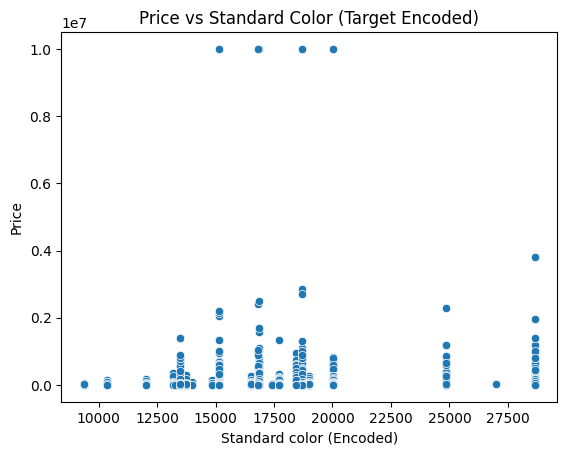

In [23]:
# Scatter plot for Price and Standard Color (after lable encoding)
sns.scatterplot(data=adv, x='color_encoded', y='price')
plt.title('Price vs Standard Color (Target Encoded)')
plt.xlabel('Standard color (Encoded)')
plt.ylabel('Price')
plt.show()

In [24]:
#I want to show which colors are associated with which values ​​of the average price
color_mapping = pd.DataFrame({
    'Color': adv['standard_colour'].unique(),
    'Encoded Value': adv['color_encoded'].unique()
}).sort_values(by='Encoded Value')
#Display the color-price mapping for reference
print(color_mapping)


          Color  Encoded Value
18         Pink    9368.060976
16        Beige   10352.538012
19       Maroon   12036.283019
9        Purple   13165.540875
17     Burgundy   13220.047619
2         Brown   13278.984608
7        Silver   13470.014861
4        Bronze   13734.460902
20      Magenta   14010.933333
13    Turquoise   14857.798046
3           Red   15143.775890
14         Gold   16512.962103
6         White   16798.955114
1          Blue   16859.234176
21         Navy   17434.857143
11       Orange   17701.321184
10        Green   18449.089766
5         Black   18677.015124
15  Multicolour   18979.063107
0          Grey   20036.613452
12       Yellow   24867.117310
22       Indigo   27000.000000
8       Unknown   28649.659167


<ipython-input-25-a32954752c8e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=adv, x='standard_colour', y='price', ci=None, palette='Set2')
<ipython-input-25-a32954752c8e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=adv, x='standard_colour', y='price', ci=None, palette='Set2')


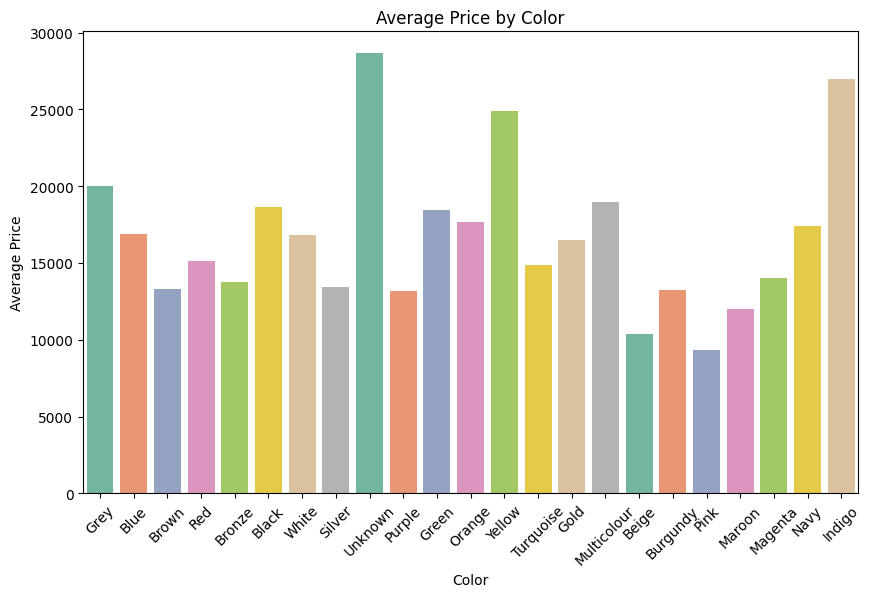

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=adv, x='standard_colour', y='price', ci=None, palette='Set2')
plt.title('Average Price by Color')
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.xticks(rotation=45) # I rotated x-axis lable (color) for better readability
plt.show()


<ipython-input-26-4afcc1ade7a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_adv, x='standard_make_encoded', y='price', palette='Set3')


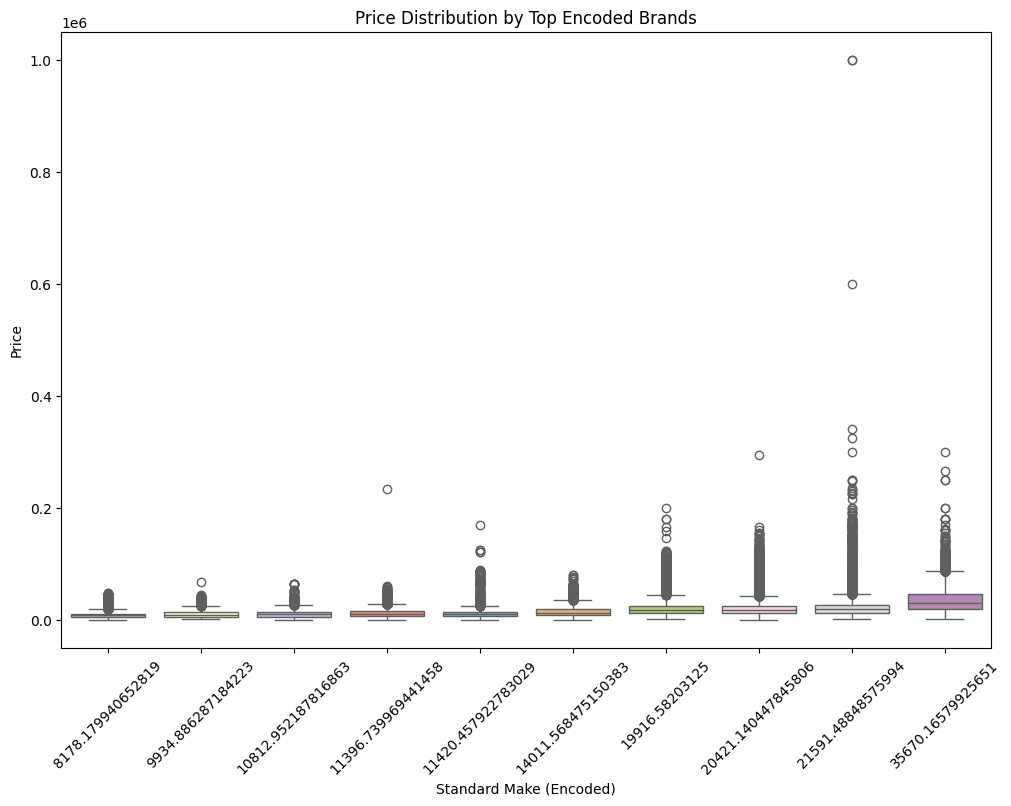

In [26]:
# I want to filter for top brands based on encoding to draw the box plot
top_brands = adv.groupby('standard_make_encoded')['price'].count().sort_values(ascending=False).head(10).index
filtered_adv = adv[adv['standard_make_encoded'].isin(top_brands)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_adv, x='standard_make_encoded', y='price', palette='Set3')
plt.title('Price Distribution by Top Encoded Brands')
plt.xlabel('Standard Make (Encoded)')
plt.ylabel('Price')
plt.xticks(rotation=45, fontsize=10)  # I rotate and resize labels
plt.show()


<ipython-input-27-3bbbb3825c1e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_prices.index, y=average_prices.values, palette='viridis')


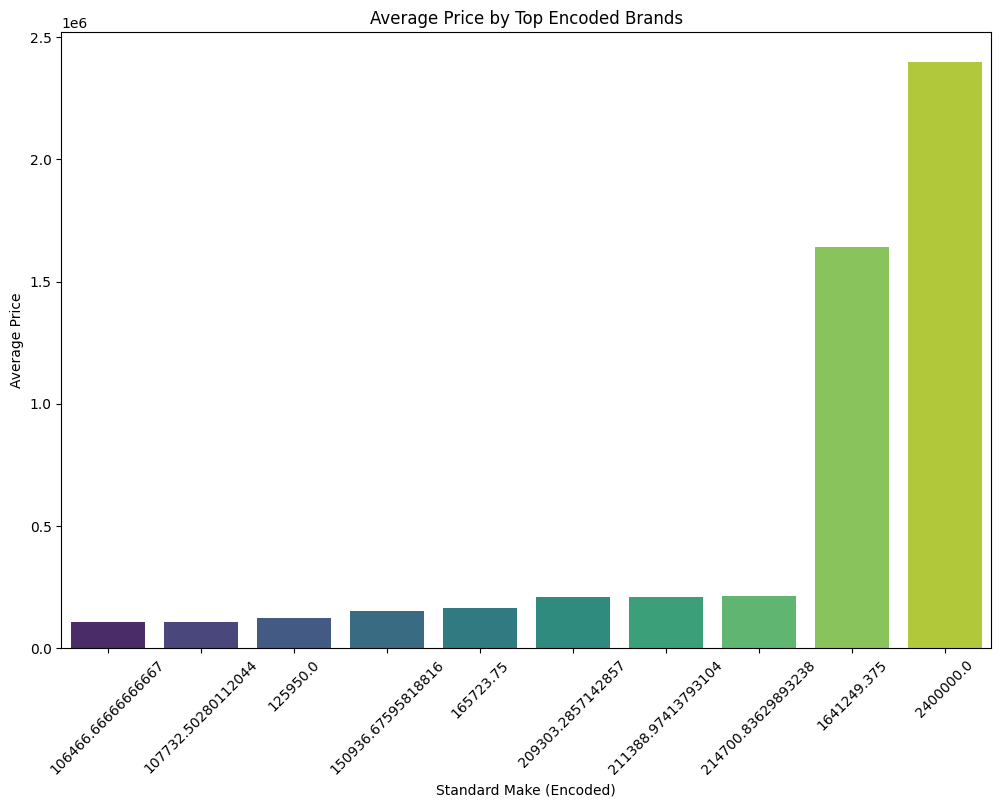

In [27]:
# I calculate average price for top encoded brands to draw their barplot
average_prices = adv.groupby('standard_make_encoded')['price'].mean().sort_values().tail(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_prices.index, y=average_prices.values, palette='viridis')
plt.title('Average Price by Top Encoded Brands')
plt.xlabel('Standard Make (Encoded)')
plt.ylabel('Average Price')
plt.xticks(rotation=45, fontsize=10)  # I rotated x-axis and resize lable for better readability
plt.show()


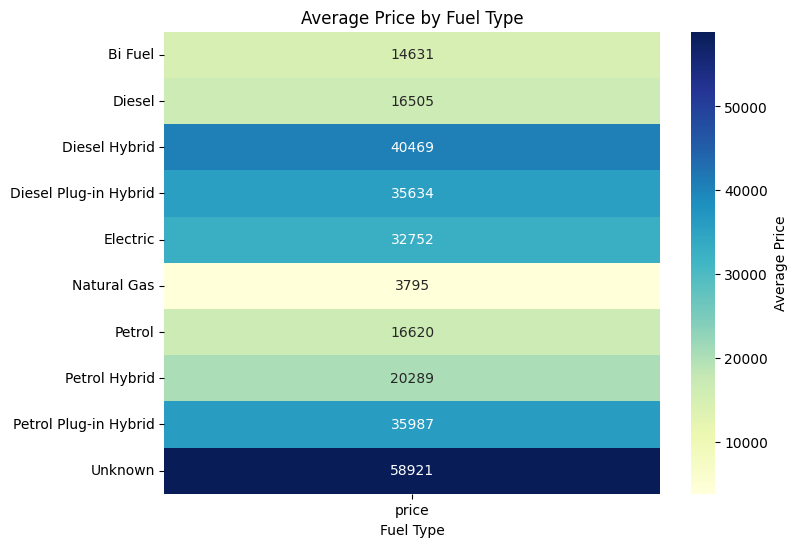

In [28]:
#  I calclude mean price for each fuel type to draw the heatmap
fuel_type_price_pivot = adv.pivot_table(index='fuel_type', values='price', aggfunc='mean')

# Heat map creating
plt.figure(figsize=(8, 6))
sns.heatmap(fuel_type_price_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Average Price'})
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('')
plt.show()


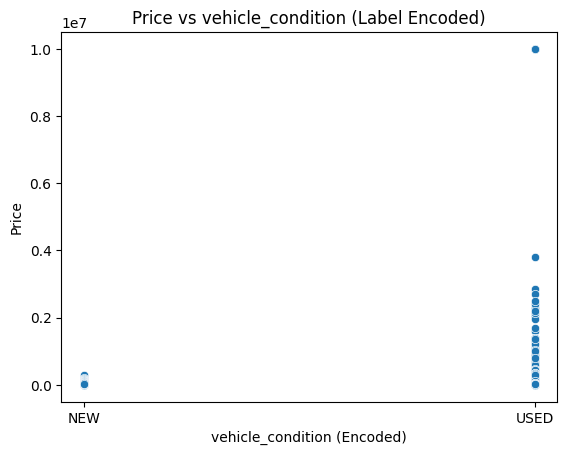

In [29]:
# Scatter plot for Price and vehicle_condition (after lable encoding)
sns.scatterplot(data=adv, x='vehicle_condition', y='price')
plt.title('Price vs vehicle_condition (Label Encoded)')
plt.xlabel('vehicle_condition (Encoded)')
plt.ylabel('Price')
plt.show()

<ipython-input-30-8c201fab2e3b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=adv, x='vehicle_condition_encoded', y='price', palette='Set3')


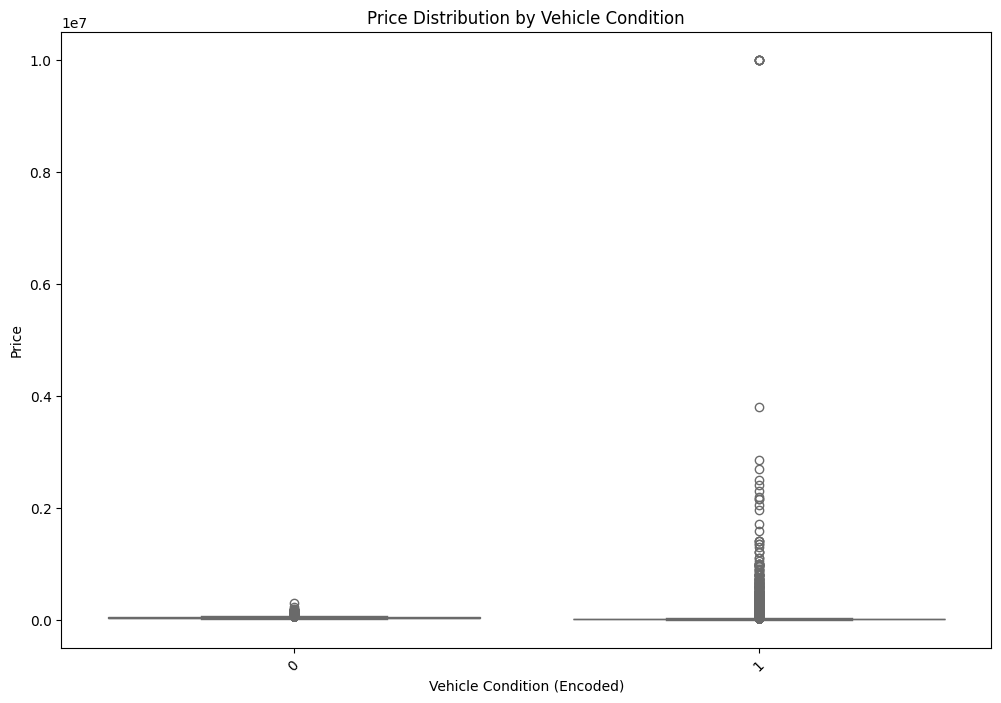

In [30]:
plt.figure(figsize=(12, 8))  # Increase the figure size
sns.boxplot(data=adv, x='vehicle_condition_encoded', y='price', palette='Set3')
plt.title('Price Distribution by Vehicle Condition')
plt.xlabel('Vehicle Condition (Encoded)')
plt.ylabel('Price')
plt.xticks(rotation=45)  # I rotated x-axis lable for better readability
plt.show()

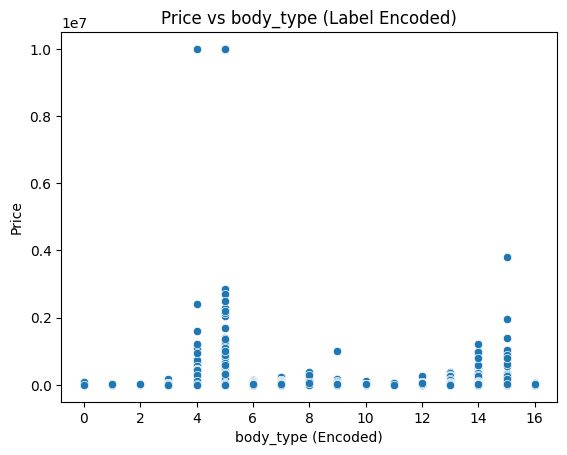

In [31]:
# Scatter plot for Price and body_type (after lable encoding)
sns.scatterplot(data=adv, x='body_type_encoded', y='price')
plt.title('Price vs body_type (Label Encoded)')
plt.xlabel('body_type (Encoded)')
plt.ylabel('Price')
plt.show()

<ipython-input-32-8c44c7e21cdd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=adv, x='body_type', y='price', palette='Set3')


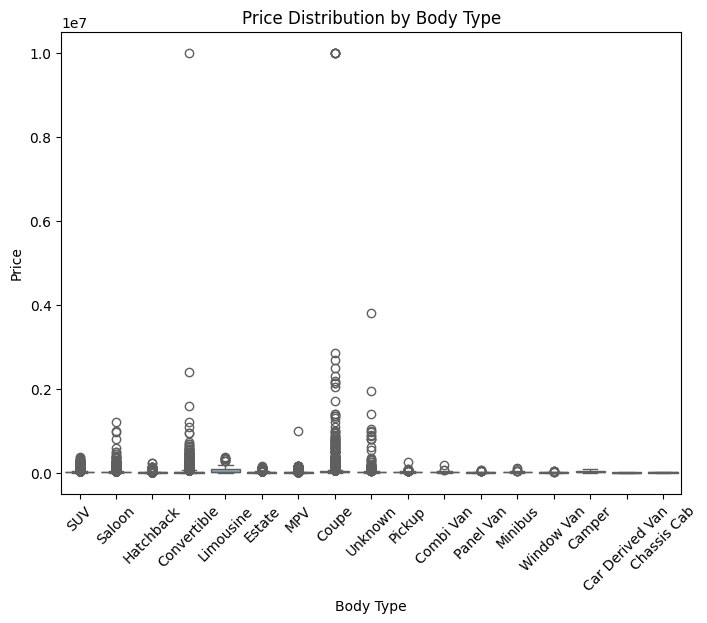

In [32]:
# Price and Body Type Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=adv, x='body_type', y='price', palette='Set3')
plt.title('Price Distribution by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.xticks(rotation=45)# I rotated x-axis lable for better readability
plt.show()

<ipython-input-33-28b8daee7ebc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adv, x='vehicle_condition', palette='Set2')


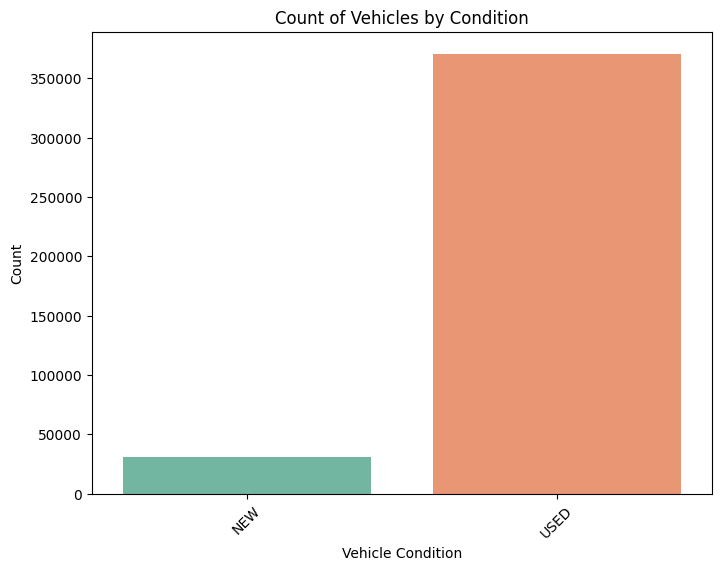

In [33]:
# I want to show the Bar Chart of Vehicle Condition Counts
plt.figure(figsize=(8, 6))
sns.countplot(data=adv, x='vehicle_condition', palette='Set2')
plt.title('Count of Vehicles by Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)# I rotated x-axis lable for better readability
plt.show()

In [34]:
# I applied Yeo-Johnson power transformation for normalizing numerical features
power_transformer = PowerTransformer(method='yeo-johnson')
adv[num_cols] = power_transformer.fit_transform(adv[num_cols])

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [35]:
# Removing cars that have prices above a reasonable threshold
adv = adv[adv['price'] <= 100000]

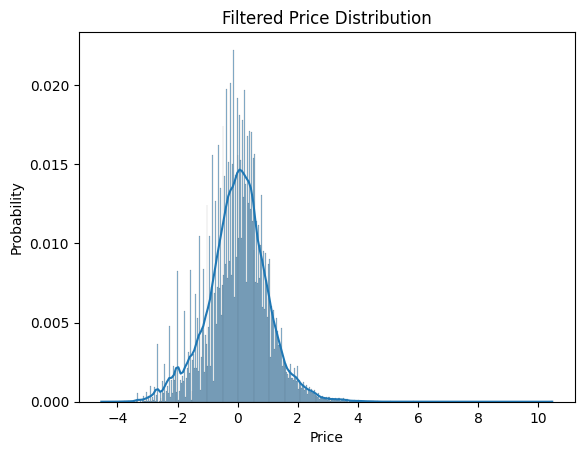

In [36]:
# The histogram of the filtered price distribution
sns.histplot(data=adv, x='price', kde=True, stat='probability')
plt.title('Filtered Price Distribution')
plt.xlabel('Price')
plt.ylabel('Probability')
plt.show()


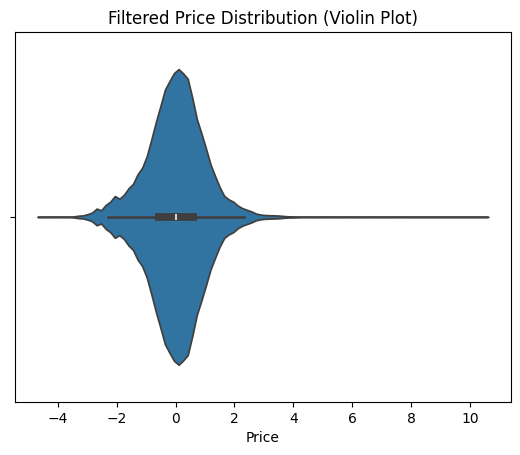

In [37]:
# The violon plot of filtered price
sns.violinplot(data=adv, x='price')
plt.title('Filtered Price Distribution (Violin Plot)')
plt.xlabel('Price')
plt.show()

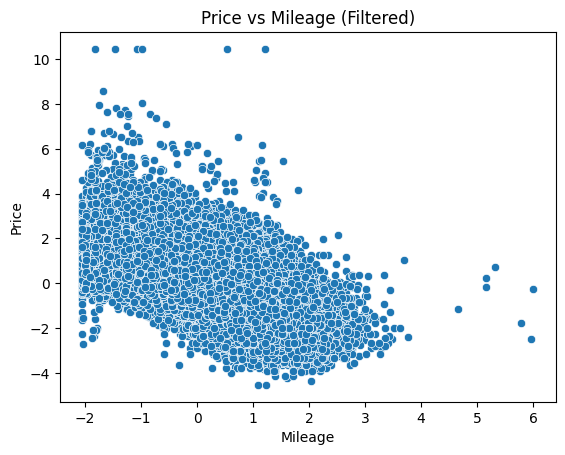

In [38]:
# Scatter plot for price and mileage (filtered)
sns.scatterplot(data=adv, x='mileage', y='price')
plt.title('Price vs Mileage (Filtered)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [39]:
# 4. I want to define features and target (after encoding)
features = ['mileage', 'year_of_registration', 'fuel_type_encoded',
            'body_type_encoded', 'vehicle_condition_encoded', 'color_encoded','standard_make_encoded']
target = 'price'



# I create fearures matrix and target vector
X = adv[features]
y = adv[target]

# Printig and diplaying features and target
print(f"Features: {features}")
print(f"Target: {target}")



Features: ['mileage', 'year_of_registration', 'fuel_type_encoded', 'body_type_encoded', 'vehicle_condition_encoded', 'color_encoded', 'standard_make_encoded']
Target: price


In [40]:
#I want to spilit the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Printing dataset size
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (321604, 7)
Test set size: (80401, 7)


In [42]:
data_split = {'Train': len(X_train), 'Test': len(X_test)}

<ipython-input-43-25f4e1d69483>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(data_split.keys()), y=list(data_split.values()), palette='Set2')


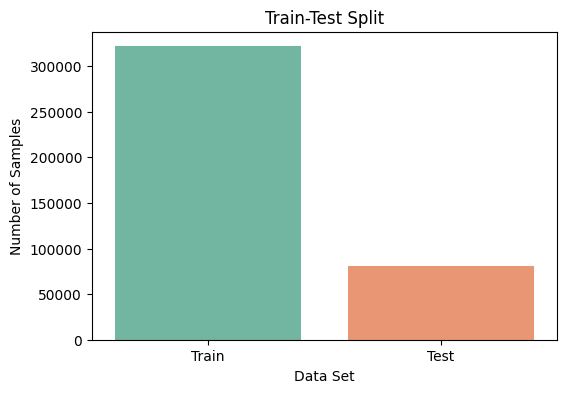

In [43]:
#I want to show the barchart the number of train and test
plt.figure(figsize=(6, 4))
sns.barplot(x=list(data_split.keys()), y=list(data_split.values()), palette='Set2')
plt.title('Train-Test Split')
plt.xlabel('Data Set')
plt.ylabel('Number of Samples')
plt.show()

In [44]:
# I want to apply features scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Printing the processed dataset
print("First few rows of the processed dataset:")
print(adv.head())

First few rows of the processed dataset:
   public_reference   mileage reg_code standard_colour     standard_model  \
0   202006039777689 -2.052070      NaN            Grey               XC90   
1   202007020778260  1.486599       61            Blue                 XF   
2   202007020778474 -0.732791       17            Grey               Yeti   
3   202007080986776  0.500114       16           Brown              Mokka   
4   202007161321269  0.858441       64            Grey  Range Rover Sport   

  vehicle_condition  year_of_registration     price  body_type  \
0               NEW              0.182414  2.269969        SUV   
1              USED             -1.081222 -0.648943     Saloon   
2              USED              0.452758  0.152136        SUV   
3              USED              0.182414 -0.498808  Hatchback   
4              USED             -0.081883  0.953593        SUV   

   crossover_car_and_van              fuel_type  standard_make_encoded  \
0                  False 

In [46]:
# I want to define evaluation metrics for Cross-Validation
scorer_r2 = 'r2'

# Cross-Validation for Linear Regression
cv_scores_lr = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5, scoring=scorer_r2)
print(f"Linear Regression - Cross-Validated R²: {cv_scores_lr.mean():.4f}")

# Cross-Validation for k-NN
cv_scores_knn = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=5, scoring=scorer_r2)
print(f"k-NN - Cross-Validated R²: {cv_scores_knn.mean():.4f}")

# Cross-Validation for Decision Tree
cv_scores_tree = cross_val_score(DecisionTreeRegressor(), X_train_scaled, y_train, cv=5, scoring=scorer_r2)
print(f"Decision Tree - Cross-Validated R²: {cv_scores_tree.mean():.4f}")

Linear Regression - Cross-Validated R²: 0.6842
k-NN - Cross-Validated R²: 0.8713
Decision Tree - Cross-Validated R²: 0.8238


In [47]:
#I used the Grid Search to find the best KNN parameters
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2', return_train_score=True)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
print("Best parameters for k-NN:", grid_search_knn.best_params_)

# #I used the Grid Search to find the best Decission Tree parameters
param_grid_tree = {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]}
grid_search_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_tree, cv=5, scoring='r2',return_train_score=True)
grid_search_tree.fit(X_train, y_train)
best_tree = grid_search_tree.best_estimator_
print("Best parameters for Decision Tree:", grid_search_tree.best_params_)

# I used the Grid Search to find the best Linear Regression parameters
param_grid_lr = {'fit_intercept': [True, False]}
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='r2',return_train_score=True)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best parameters for Linear Regression:", grid_search_lr.best_params_)
# In this step I want to extract Grid Search results into DataFrames
knn_results = pd.DataFrame(grid_search_knn.cv_results_)
tree_results = pd.DataFrame(grid_search_tree.cv_results_)
lr_results = pd.DataFrame(grid_search_lr.cv_results_)

Best parameters for k-NN: {'n_neighbors': 7, 'weights': 'uniform'}
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Best parameters for Linear Regression: {'fit_intercept': True}


In [48]:
# I use the function to convert Grid Search result to a DataFrame
def summarize_grid_search(grid_search, params, model_name):
    # Convert GridSearchCV results to a DataFrame
    gs_df = pd.DataFrame(grid_search.cv_results_)

    # I select only the relevant columns
    gs_df_sh = gs_df[
        [f'param_{param}' for param in params] +  # Include parameters
        ['mean_train_score', 'std_train_score',  # Training scores
         'mean_test_score', 'std_test_score',   # Test scores
         'rank_test_score']                     # Rank
    ]

    # I add a column for model name
    gs_df_sh['Model'] = model_name

    # Sort by rank (ascending order)
    gs_df_sh = gs_df_sh.sort_values('rank_test_score')

    return gs_df_sh

# I extract and summarize results for each model
knn_params = ['n_neighbors', 'weights']
knn_summary = summarize_grid_search(grid_search_knn, knn_params, "k-NN")

tree_params = ['max_depth', 'min_samples_split']
tree_summary = summarize_grid_search(grid_search_tree, tree_params, "Decision Tree")

lr_params = ['fit_intercept']
lr_summary = summarize_grid_search(grid_search_lr, lr_params, "Linear Regression")

# Combine all summaries into one DataFrame
all_summaries = pd.concat([knn_summary, tree_summary, lr_summary], ignore_index=True)

# Display the summarized results
print("Summarized Grid Search Results:")
print(all_summaries.head(10))  # Display the top 10 configurations

# I save to a CSV file for future analysis
all_summaries.to_csv("grid_search_summary.csv", index=False)


Summarized Grid Search Results:
   param_n_neighbors param_weights  mean_train_score  std_train_score  \
0                7.0       uniform          0.914542         0.000211   
1                9.0       uniform          0.908196         0.000314   
2                5.0       uniform          0.923091         0.000167   
3                9.0      distance          0.993314         0.000047   
4                7.0      distance          0.993208         0.000054   
5                3.0       uniform          0.938090         0.000099   
6                5.0      distance          0.992989         0.000064   
7                3.0      distance          0.992362         0.000096   
8                NaN           NaN          0.956686         0.000212   
9                NaN           NaN          0.975809         0.000164   

   mean_test_score  std_test_score  rank_test_score          Model  \
0         0.884809        0.001548                1           k-NN   
1         0.883828      

<ipython-input-48-316bd40fd762>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gs_df_sh['Model'] = model_name
<ipython-input-48-316bd40fd762>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gs_df_sh['Model'] = model_name
<ipython-input-48-316bd40fd762>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

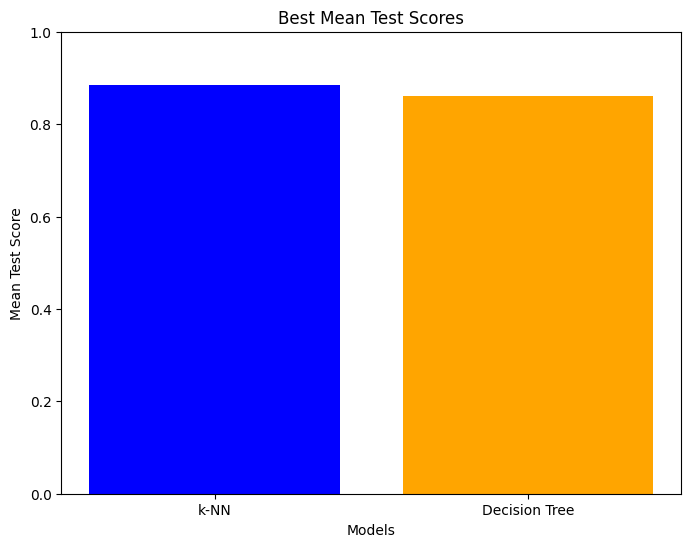

In [49]:
# I extract top scores for each model
best_knn_score = knn_results['mean_test_score'].max()
best_tree_score = tree_results['mean_test_score'].max()

# In this step I prepare data for plotting
models = ['k-NN', 'Decision Tree']
scores = [best_knn_score, best_tree_score]

# I want to plot the best mean test score
plt.figure(figsize=(8, 6))
plt.bar(models, scores, color=['blue', 'orange'])
plt.title('Best Mean Test Scores')
plt.ylabel('Mean Test Score')
plt.xlabel('Models')
plt.ylim(0, 1.0) # I want to set y-axis limits between 0 and 1
plt.show()


Linear Regression - MSE: 0.30, MAE: 0.38, R²: 0.6919


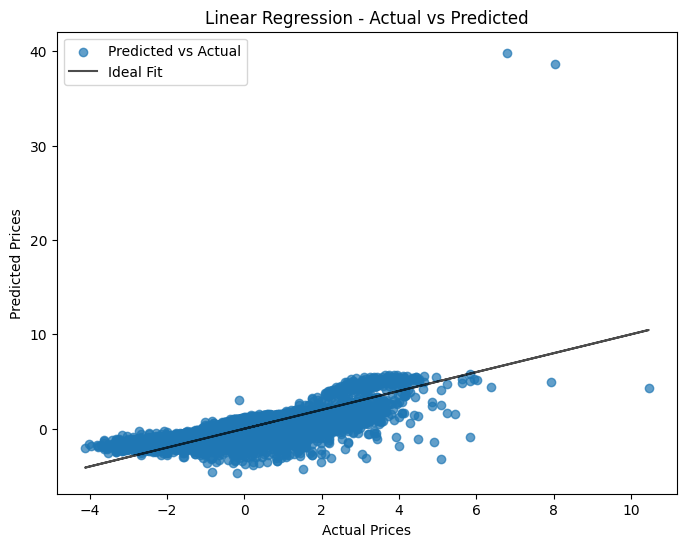

k-NN - MSE: 0.11, MAE: 0.23, R²: 0.8875


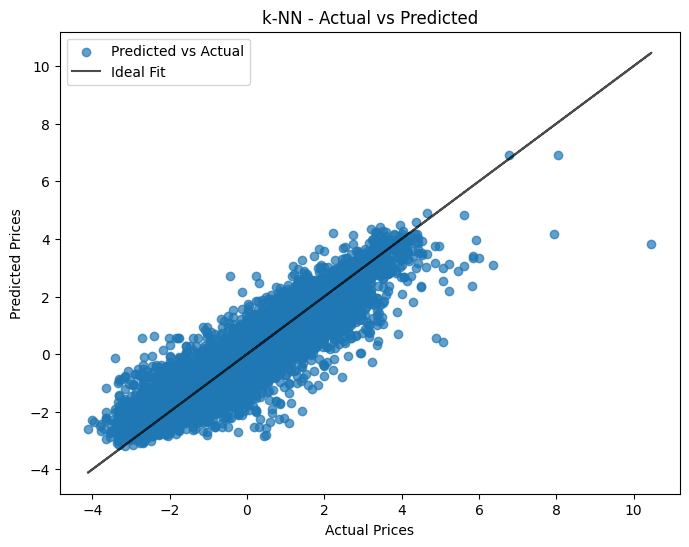

Decision Tree - MSE: 0.14, MAE: 0.25, R²: 0.8618


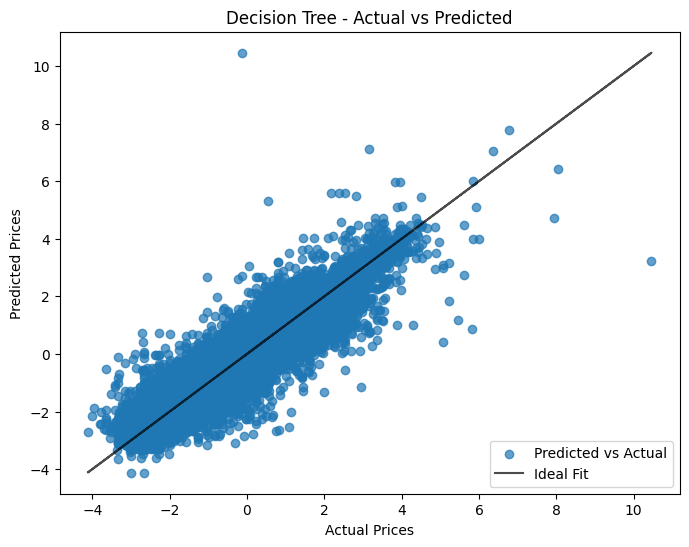

In [50]:
#I want to Visualize the Actual and Predicted Prices
# Models Defining
models = {
    'Linear Regression': best_lr,
    'k-NN': best_knn,
    'Decision Tree': best_tree
}

#Training, prediction, and evaluation By a loop of models which I built
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    #Pretiction of Prices
    y_pred = model.predict(X_test)

    # The models evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

   #Printing Evaluation Metrics
    print(f"{model_name} - MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

    #Actual and Predicted Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
    plt.plot(y_test, y_test, '-k', label='Ideal Fit', alpha=0.7)  # Ideal Fit Line
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.legend()
    plt.show()


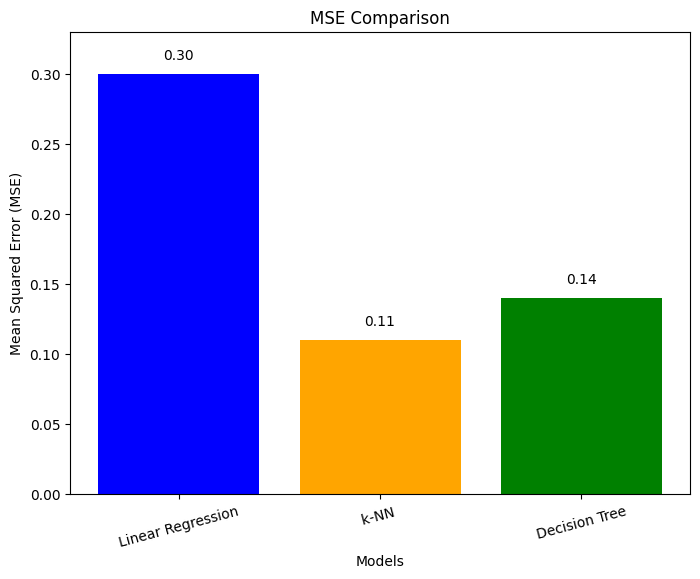

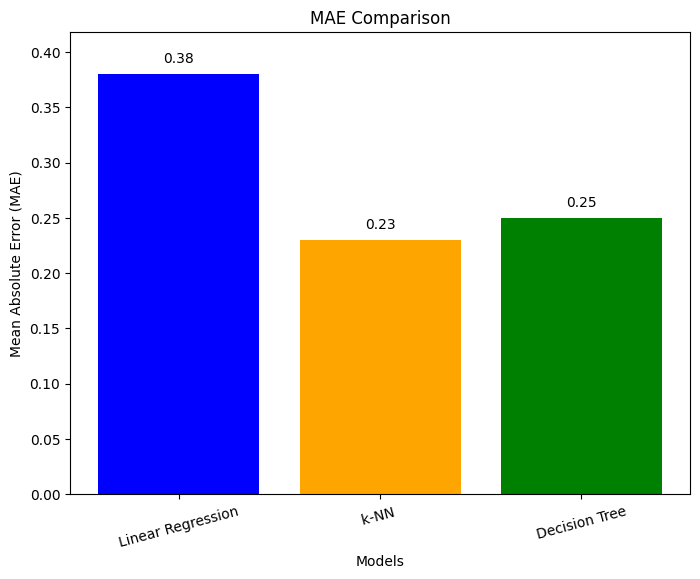

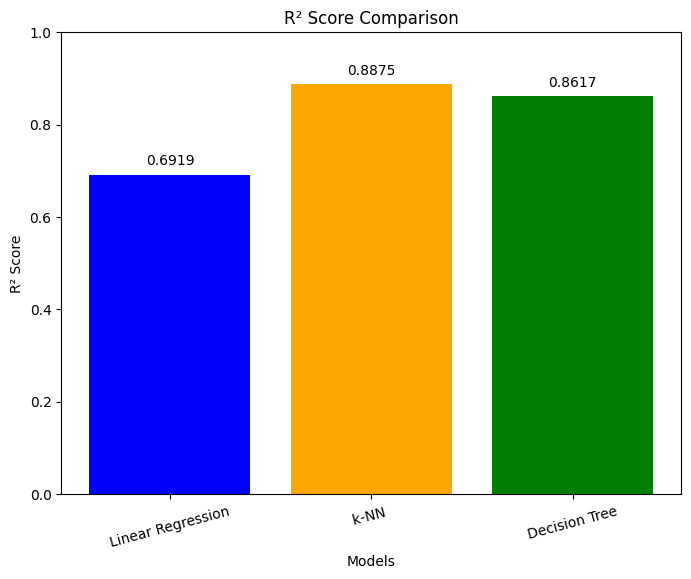

In [51]:
# In this step I want to plot the barchart the Comparison of MSE, MAE and R²
# Performance Metrics for the Models which I found above for plotting barchart
models = ['Linear Regression', 'k-NN ', 'Decision Tree']
mse_values = [0.30, 0.11, 0.14]
mae_values = [0.38, 0.23, 0.25]
r2_values = [0.6919, 0.8875, 0.8617]

# The Comparison of MSE
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green'])
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.xticks(rotation=15)
plt.ylim(0, max(mse_values) * 1.1)  #I want to  adjust and modify Y-axis
for i, v in enumerate(mse_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')  # I want to adjust text position
plt.show()

# MAE Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['blue', 'orange', 'green'])
plt.title('MAE Comparison')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Models')
plt.xticks(rotation=15)
plt.ylim(0, max(mae_values) * 1.1)  # I want to adjust and modify Y-axis
for i, v in enumerate(mae_values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')  # Adjust text position
plt.show()

# R² Score Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, r2_values, color=['blue', 'orange', 'green'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.xticks(rotation=15)
plt.ylim(0, 1.0)  # I want to adjust R² score range
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')  # I want to adjust text position
plt.show()


Feature Importances:
                     Feature  Importance
1       year_of_registration    0.450944
6      standard_make_encoded    0.320113
0                    mileage    0.152401
3          body_type_encoded    0.044545
2          fuel_type_encoded    0.019441
5              color_encoded    0.010614
4  vehicle_condition_encoded    0.001942


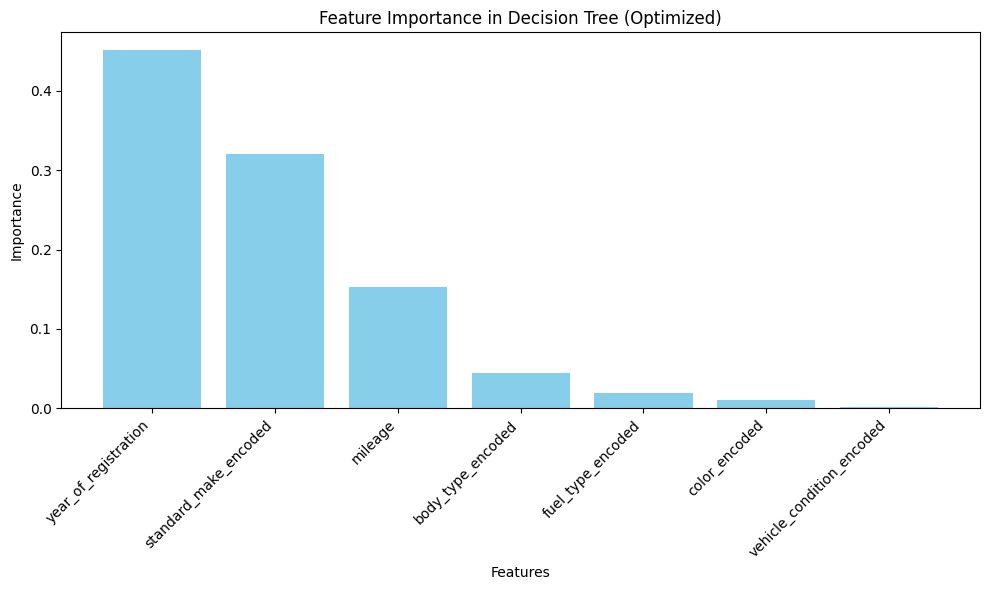

In [52]:
#Feature importance by the best hyperparameters which I found by Grid Search
#I Use the best values for `max_depth` and `min_samples_split` which I found earlier
dt_model = DecisionTreeRegressor(max_depth=None, min_samples_split=10, random_state=42)
dt_model.fit(X, y)

#I extract Feature importances from trained Decision Tree model
feature_importances = dt_model.feature_importances_

# I create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X.columns,  # Dynamically retrieve feature names
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# I want to display the Feature Importance DataFrame
print("Feature Importances:")
print(features_df)

# I want to Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.title('Feature Importance in Decision Tree (Optimized)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')  # I rotated feature names for better readability
plt.tight_layout()
plt.show()

In [53]:
# For Fine-Grained Evaluation I use Instance-Level Errors
#I create a DataFrame to store actual prices, predicted prices, and absolute errors
errors = pd.DataFrame({
    'Actual': y_test,
    'Predicted': model.predict(X_test_scaled),
    'Error': abs(y_test - model.predict(X_test_scaled))
})

#I Select instances by the 10 smallest errors
instance_level_errors = errors.nsmallest(10, 'Error', keep='first')

#Printing instance-level errors
print("Instance-Level Errors (Smallest Errors):")
print(instance_level_errors)


Instance-Level Errors (Smallest Errors):
          Actual  Predicted  Error
215696  0.348344   0.348344    0.0
247347  0.233962   0.233962    0.0
353917  0.233962   0.233962    0.0
237094  0.233962   0.233962    0.0
353734  0.233962   0.233962    0.0
250324  0.233962   0.233962    0.0
363752  0.233962   0.233962    0.0
36339   0.233962   0.233962    0.0
337275 -0.186364  -0.186364    0.0
331330  0.233962   0.233962    0.0


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


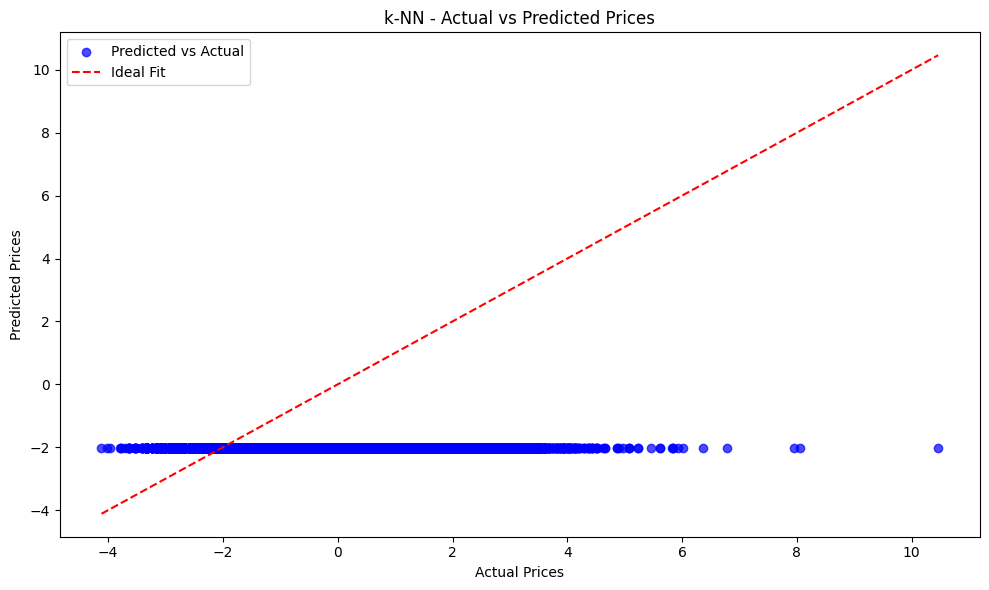

In [54]:
# I want to create a Scatter Plot of Actual and Predicted Prices for k-NN
y_pred_knn = best_knn.predict(X_test_scaled)  # I use the trained k-NN model to predict prices

# Scatter plot for k-NN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')  # Ideal fit line
plt.xlabel('Actual Prices') # Label for x-axi
plt.ylabel('Predicted Prices') # Label for y-axi
plt.title('k-NN - Actual vs Predicted Prices') # Title of the plot
plt.legend()
plt.tight_layout()
plt.show() # Display the plot



In [55]:
#Top Errors
predictions = model.predict(X_test_scaled)

#I want to calculate top errors
errors = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions,
    'Error': abs(y_test - predictions)
})

#I want to Identify the 10 largest absolute errors
top_errors = errors.sort_values(by='Error', ascending=False).head(10)

#I want to display the top Errors
print("Top Errors:")
print(top_errors)


Top Errors:
           Actual  Predicted      Error
252505  10.461789   0.219486  10.242303
51741    8.047257  -1.347944   9.395201
212615   6.372815  -1.347944   7.720759
64910    7.945294   0.522094   7.423200
264371   6.784861   0.246467   6.538394
390062   6.013695   0.277486   5.736209
78714    5.463545  -0.237694   5.701239
160077   5.931312   0.277486   5.653827
326494   5.840865   0.277486   5.563379
148150   5.840679   0.277486   5.563193


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
